In [32]:
import cv2
import pandas as pd
import random
import shutil

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
metadata = pd.read_csv("/Users/rhussain/Downloads/NIH_chest_xray/BBox_List_2017.csv")

In [3]:
metadata.head()

,Image Index,Finding Label,Bbox [x,y,w,h],Unnamed: 6,Unnamed: 7,Unnamed: 8
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441,NaN,NaN,NaN
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525,NaN,NaN,NaN
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153,NaN,NaN,NaN
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034,NaN,NaN,NaN
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695,NaN,NaN,NaN


In [4]:
metadata = metadata[
    (metadata["Finding Label"] == "Nodule") | 
    (metadata["Finding Label"] == "Mass")    
]

In [5]:
metadata["Finding Label"].value_counts()

Finding Label
Mass      85
Nodule    79
Name: count, dtype: int64

In [6]:
def plot_box(x, image, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (image.shape[0] + image.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(image, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(image, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(image, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

In [21]:
index = 11
image_path = f"/Users/rhussain/Downloads/archive/all_images/{metadata.iloc[index]['Image Index']}"

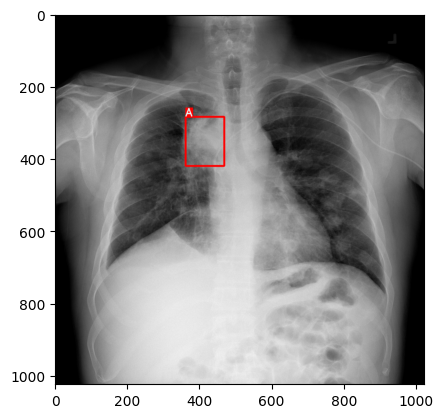

In [22]:
w = metadata.iloc[index]['w']
h = metadata.iloc[index]['h]']

x1 = metadata.iloc[index]['Bbox [x']
y1 = metadata.iloc[index]['y']
x2 = x1+w
y2 = y1+h

image = cv2.imread(image_path)
plot_box([x1,y1,x2,y2], image, color=[255, 0, 0], label="A", line_thickness=None)
plt.imshow(image)

## Train Test Split

Here we move the images into the appropriate directories after creating a train/test split

In [26]:
# create train test split of  metadata
metadata = metadata.sample(frac=1).reset_index(drop=True)
train = metadata.sample(frac=0.8, random_state=0)
val = metadata.drop(train.index)

In [27]:
def create_image_path(row, train=True):
    if train:
        return f"/Users/rhussain/repos/lung_cancer_detector/cxr_data/images/train/{row['Image Index']}"
    else:
        return f"/Users/rhussain/repos/lung_cancer_detector/cxr_data/images/val/{row['Image Index']}"

In [28]:
train["image_path"] = train.apply(create_image_path, train=True, axis=1)
val["image_path"] = val.apply(create_image_path, train=False, axis=1)

In [33]:
def copy_images(row):
    src = f"/Users/rhussain/Downloads/archive/all_images/{row['Image Index']}"
    dst = row["image_path"]
    shutil.copyfile(src, dst)

In [34]:
train.apply(copy_images, axis=1)
val.apply(copy_images, axis=1)

9      None
21     None
25     None
28     None
29     None
31     None
32     None
34     None
36     None
39     None
47     None
58     None
67     None
70     None
72     None
77     None
79     None
81     None
82     None
87     None
88     None
99     None
103    None
114    None
115    None
117    None
127    None
138    None
140    None
144    None
154    None
156    None
159    None
dtype: object

In [39]:
def create_label_file(row, train=True):
    if train:
        path = f"/Users/rhussain/repos/lung_cancer_detector/cxr_data/labels/train/{row['Image Index'].replace('.png', '.txt')}"
    else:
        path = f"/Users/rhussain/repos/lung_cancer_detector/cxr_data/labels/val/{row['Image Index'].replace('.png', '.txt')}"
    
    x_center = row['Bbox [x'] + row['w'] / 2
    y_center = row['y'] + row['h]'] / 2
    width = row['w']
    height = row['h]']

    x = x_center / 1024
    y = y_center / 1024
    w = width / 1024
    h = height / 1024
    with open(path, "w") as f:
        f.write(f"0 {x} {y} {w} {h}")

In [40]:
train.apply(create_label_file, train=True, axis=1)
val.apply(create_label_file, train=False, axis=1)

9      None
21     None
25     None
28     None
29     None
31     None
32     None
34     None
36     None
39     None
47     None
58     None
67     None
70     None
72     None
77     None
79     None
81     None
82     None
87     None
88     None
99     None
103    None
114    None
115    None
117    None
127    None
138    None
140    None
144    None
154    None
156    None
159    None
dtype: object